
### 1.0 Defining the Question
The hotel booking demand dataset has hotel booking information of resort hotels in Portugal. These hotels receive guests throughout the year who make reservation/booking through a booking app. The management of the hotel wishes to analyse  the reservations made by guests to see if one leads to cancellation or it remains uncancelled. This will help the management organize their stuff appropriately to provide efficient services to the guests.






**Dataset provided**

hotel booking dataset  [link](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

Data grossary

* **Hotel:** (H1 = Resort Hotel or H2 = City Hotel)
* is_canceled: Value indicating if the booking was canceled (1) or not (0)
* **lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* **arrival_date_year:** Year of arrival date
* **arrival_date_month**: Month of arrival date
* **arrival_date_week_number:** Week number of year for arrival date
* **arrival_date_day_of_month:** Day of arrival date
* **stays_in_weekend_nights**:Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_night:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults:** Number of adults
* **deposit_type;** whether the customer paid deposit or not.
* **agent:** agent id
* **company:** company reversation or not 
* **days_in_waiting_list:** time it takes for the client booking to be accepted.
* **customer_type:** type of the customer
* **adr:** client address
* **required_car_parking_spaces**: car parking space
* **total_of_special_requests:** number of special guests
* **reservation_status:** reservation status(checked in, checked out)
* **reservation_status_date:** date of reservation.


###1.1 Specifying the data analytic question
To predict if the client who made the hotel reservation will cancel or not cancel.

### 1.2 Defining the metric for success

identify the best model with over 80% accuracy to be used to predict on whether the hotel reservation will be canceled or not cancelled.

### 1.4 Recording the Experimental Design

* upload and read our csv files
* clean our dataset
* perfom EDA
* build our models using
   * Logistic Reg
   * Random Forest
   * Gradient Boosted Trees
   * Naive Bayes Classifier
   * Neural Network
   * k-NN classifier
   * SVM
* challenge our solution
* Evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

### 1.5 Assessing the Relevance of the 

the dataset is relevant since it has all the features related to hotel activities

### 2.Loading and reading Our Datasets

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING DATASET 

In [2]:
# Loading the datasets
names = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
hotel_df = pd.read_csv('hotel_bookings.csv', usecols=names)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


### CHECKING THE DATA

In [3]:
# Determing the number of records in our dataset
hotel_df.shape

(21950, 32)

In [4]:
# Previewing the first records of our dataset
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [5]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
# Previewing the last records of our dataset
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21945,Resort Hotel,0,8,2016,March,11,11,0,2,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,171.0,NaN,0,Transient,43.0,1.0,1.0,Check-Out,2016-03-13
21946,Resort Hotel,0,8,2016,March,11,11,0,2,2,0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,171.0,NaN,0,Transient,37.0,0.0,1.0,Check-Out,2016-03-13
21947,Resort Hotel,0,1,2016,March,11,12,0,1,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,240.0,NaN,0,Transient,64.0,1.0,0.0,Check-Out,2016-03-13
21948,Resort Hotel,0,30,2016,March,11,11,0,2,1,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,D,1,No Deposit,375.0,NaN,0,Transient-Party,25.0,0.0,0.0,Check-Out,2016-03-13
21949,Resort Hotel,0,1,2016,March,11,12,0,1,1,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,NaN,0,Tra,NaN,NaN,NaN,NaN,NaN


In [7]:
#consice summary of train dataset
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21950 entries, 0 to 21949
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21950 non-null  object 
 1   is_canceled                     21950 non-null  int64  
 2   lead_time                       21950 non-null  int64  
 3   arrival_date_year               21950 non-null  int64  
 4   arrival_date_month              21950 non-null  object 
 5   arrival_date_week_number        21950 non-null  int64  
 6   arrival_date_day_of_month       21950 non-null  int64  
 7   stays_in_weekend_nights         21950 non-null  int64  
 8   stays_in_week_nights            21950 non-null  int64  
 9   adults                          21950 non-null  int64  
 10  children                        21950 non-null  int64  
 11  babies                          21950 non-null  int64  
 12  meal                            

**observation**: our datset has 119390 observations and 32 variables, it has 4 floats, 16int and 12 object datatype.

In [8]:
# checking the target variable
hotel_df.is_canceled.value_counts() 

1    11085
0    10865
Name: is_canceled, dtype: int64

In [9]:
#getting the above in parcentage
#
hotel_df.is_canceled.value_counts() / len(hotel_df) * 100 

1    50.501139
0    49.498861
Name: is_canceled, dtype: float64

### 4. External Data Source Validation

### a. Validation

* the dataset is valid since it can be confirmed on Kaggle which is the trusted open data source, and also based on other international publications.

###5.Tidying the data




In [10]:
#creating a copy of the dataset to be be used on cleaning process
hotel_df1=hotel_df.copy()
#
#getting the irrelevant varaibles
columns = ['arrival_date_year','agent','arrival_date_week_number','lead_time', 'market_segment', 'distribution_channel','booking_changes','days_in_waiting_list', 'adr','reservation_status_date']
#
#dropping the irrelevant colunms
drop_colunms= hotel_df1.drop(columns, axis = 1, inplace=True)
#
#previewing the dataset
hotel_df1.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,company,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,July,1,0,0,2,0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0.0,0.0,Check-Out
1,Resort Hotel,0,July,1,0,0,2,0,0,BB,PRT,0,0,0,C,C,No Deposit,NaN,Transient,0.0,0.0,Check-Out
2,Resort Hotel,0,July,1,0,1,1,0,0,BB,GBR,0,0,0,A,C,No Deposit,NaN,Transient,0.0,0.0,Check-Out
3,Resort Hotel,0,July,1,0,1,1,0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0.0,0.0,Check-Out
4,Resort Hotel,0,July,1,0,2,2,0,0,BB,GBR,0,0,0,A,A,No Deposit,NaN,Transient,0.0,1.0,Check-Out


In [11]:
# Check for missing values
#
hotel_df1.isnull().sum()

hotel                                 0
is_canceled                           0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             455
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
deposit_type                          0
company                           20108
customer_type                         0
required_car_parking_spaces           1
total_of_special_requests             1
reservation_status                    1
dtype: int64

In [12]:
#getting the percentage of missing data in each column
#
hotel_df1.isnull().sum()/len(hotel_df1)* 100 



hotel                              0.000000
is_canceled                        0.000000
arrival_date_month                 0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            2.072893
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
deposit_type                       0.000000
company                           91.608200
customer_type                      0.000000
required_car_parking_spaces        0.004556
total_of_special_requests          0.004556
reservation_status                 0.004556
dtype: float64

In [13]:
# as a role of thumb, drop any colunm with more than 25% of the missing data.
#
hotel_df1 = hotel_df1[hotel_df1.columns[hotel_df1.isnull().mean() < 0.25]]
hotel_df1.shape

(21950, 21)

In [14]:
hotel_df1.isnull().sum()

hotel                               0
is_canceled                         0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           455
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
deposit_type                        0
customer_type                       0
required_car_parking_spaces         1
total_of_special_requests           1
reservation_status                  1
dtype: int64

**observation**: the data type are appropriate now and there is a clue that we have null values.

In [15]:
#filling the missing values of children variable with the mean
#
hotel_df1['children']= hotel_df1['children'].fillna(hotel_df1['children'].mean(), axis = 0)

In [16]:
#filling the missing values in the country variable with mode
#
hotel_df1.fillna({'country': hotel_df1['country'].mode()[0]}, inplace=True)

In [17]:
hotel_df1.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [18]:
#confriming no missing values.
#
hotel_df1.isnull().sum().any()

True

In [19]:
# Checking if there are duplicates
#
hotel_df1.duplicated().sum()

5669

In [20]:
# Dropping duplicates
hotel_df1.drop_duplicates(inplace=True)
#
#confirm no duplicates
#
hotel_df1.duplicated().any()

False

In [21]:
#To remove white spaces in our columns
hotel_df1.columns.str.replace(" "," ")

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

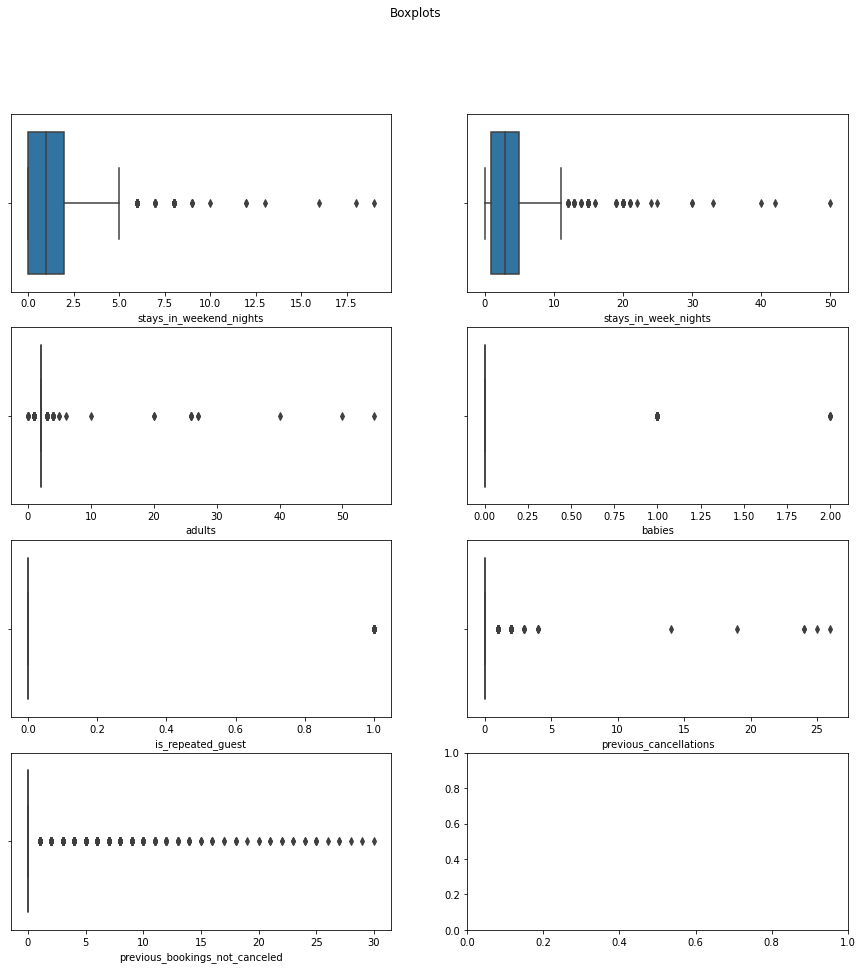

In [22]:
# To check for outliers through boxplots
#

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15, 15))

fig.suptitle('Boxplots')
sns.boxplot(hotel_df1['stays_in_weekend_nights'], ax=ax1)
sns.boxplot(hotel_df1['stays_in_week_nights'], ax=ax2)
sns.boxplot(hotel_df1['adults'], ax=ax3)
sns.boxplot(hotel_df1['babies'], ax=ax4)
sns.boxplot(hotel_df1['is_repeated_guest'], ax=ax5)
sns.boxplot(hotel_df1['previous_cancellations'], ax=ax6)
sns.boxplot(hotel_df1['previous_bookings_not_canceled'], ax=ax7)
plt.show()

In [23]:
# Check for outliers through IQR Score

# we first get the interquantile range for each column
Q1 = hotel_df1.quantile(0.25)
Q3 = hotel_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                        1.0
arrival_date_day_of_month         16.0
stays_in_weekend_nights            2.0
stays_in_week_nights               4.0
adults                             0.0
children                           0.0
babies                             0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
required_car_parking_spaces        0.0
total_of_special_requests          1.0
dtype: float64


In [24]:
# We then get the outliers as follows:
# True means presence of outliers

(hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))

,adults,arrival_date_day_of_month,arrival_date_month,assigned_room_type,babies,children,country,customer_type,deposit_type,hotel,is_canceled,is_repeated_guest,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
21946,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
21948,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
# We then filter out outliers and remain with valid values as follows

df_clean = hotel_df1[~((hotel_df1 < (Q1 - 1.5 * IQR)) |(hotel_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(8874, 21)

**observation**: clean dataset has 43962 records and 21 variables.

In [26]:
#converting the data to the correct datatype- float
#
df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests" ]] = df_clean[["is_canceled", "arrival_date_day_of_month", "stays_in_weekend_nights", "adults", "adults", "previous_cancellations","previous_cancellations", "previous_bookings_not_canceled","required_car_parking_spaces", "total_of_special_requests"]].astype(float)
#

#converting categorical variables to the correct datatype-category
#
df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status" ]] = df_clean[["hotel","arrival_date_month","meal", "country", "reserved_room_type","assigned_room_type", "deposit_type", "customer_type", "reservation_status"]].astype('category')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8874 entries, 0 to 21943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           8874 non-null   category
 1   is_canceled                     8874 non-null   float64 
 2   arrival_date_month              8874 non-null   category
 3   arrival_date_day_of_month       8874 non-null   float64 
 4   stays_in_weekend_nights         8874 non-null   float64 
 5   stays_in_week_nights            8874 non-null   int64   
 6   adults                          8874 non-null   float64 
 7   children                        8874 non-null   int64   
 8   babies                          8874 non-null   int64   
 9   meal                            8874 non-null   category
 10  country                         8874 non-null   category
 11  is_repeated_guest               8874 non-null   int64   
 12  previous_cancellati

##6. Exploratory Data Analysis

####a. Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.






In [28]:
# preview of our dataset
#
df_clean.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0.0,July,1.0,0.0,0,2.0,0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
4,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0,0,BB,GBR,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Check-Out
6,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0,0,BB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,0.0,Check-Out
7,Resort Hotel,0.0,July,1.0,0.0,2,2.0,0,0,FB,PRT,0,0.0,0.0,C,C,No Deposit,Transient,0.0,1.0,Check-Out
8,Resort Hotel,1.0,July,1.0,0.0,3,2.0,0,0,BB,PRT,0,0.0,0.0,A,A,No Deposit,Transient,0.0,1.0,Canceled


Hotel Variable.

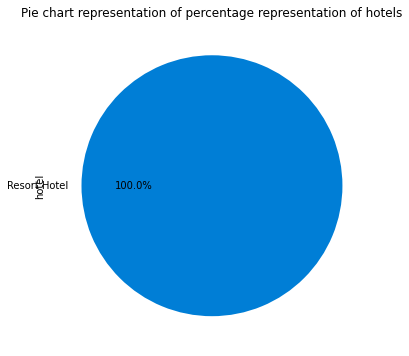

In [29]:
#univariate analysis: hotel variable piechart
#
#add colors
colors = ['#007ED6','#66b3ff']
plt.figure(figsize = (6, 6))
df_clean.hotel.value_counts().plot(kind = 'pie',colors=colors, autopct = '%0.1f%%')
plt.title('Pie chart representation of percentage representation of hotels') 
plt.show()

**observation**: city hotel registered a higher reservation of 63.7%

Percentage of cancellations.

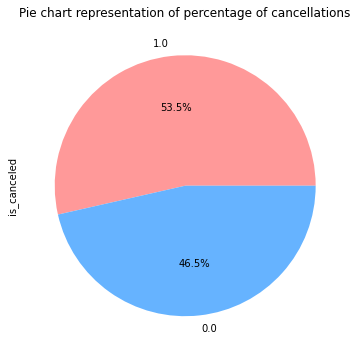

In [30]:
#univariate analysis: is cancelled variable piechart
#
colors = ['#ff9999','#66b3ff']

plt.figure(figsize = (6, 6))
df_clean.is_canceled.value_counts().plot(kind = 'pie', colors=colors, autopct = '%0.1f%%')
plt.title('Pie chart representation of percentage of cancellations') 
plt.show()

#0=> not cancelled
#1=> cancelled

**observation**: only 31% of reversation was cancelled.

Distribution of guests throughout the months.

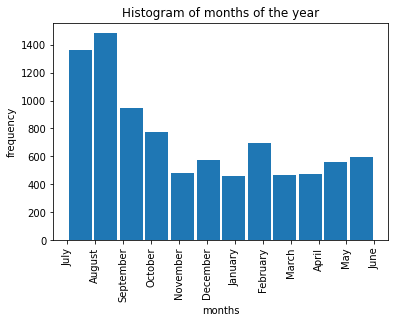

In [31]:
# univariate analysis: month of arrival variable histogram
#
plt.hist(df_clean['arrival_date_month'], bins=12, histtype='bar', rwidth=0.9)
plt.xticks(rotation=90)
plt.xlabel('months')
plt.ylabel('frequency')
plt.title('Histogram of months of the year') 
plt.show()

**observation**: The most popular months of travel were between May and August with the peak being recorded at August.

Meals Sbscription by guests.

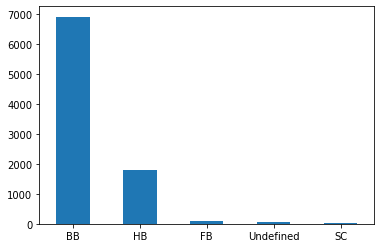

In [32]:
# univariate analysis: meal variable bar graph
df_clean.meal.value_counts().plot(kind = 'bar', rot = 0)
plt.show()

**observation**: many guests went for bed and breakfast option.

month of arrival frequency count

In [33]:
# univariate analysis: month of arrival frequency count
# 
df_clean.country.value_counts(ascending=False) 

PRT    4102
GBR    1442
ESP    1060
IRL     575
FRA     290
       ... 
DOM       1
KWT       1
KAZ       1
IDN       1
ZWE       1
Name: country, Length: 87, dtype: int64

**observation**: Most of the hotel guests came from Portugal and Great Britain.

customer type

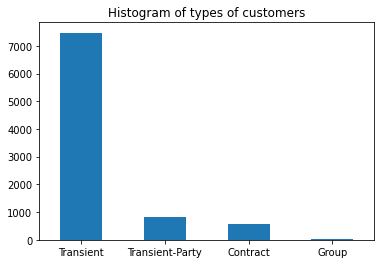

In [34]:
# univariate analysis: customer type variable bar graph
df_clean.customer_type.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Histogram of types of customers') 

plt.show()

**observation**:The most frequent type of guest was the transient.

**observation**: Most popular arrival dates for customers is 17th and  2nd early of the month mostly because that's when people get their salaries

Roomtypes

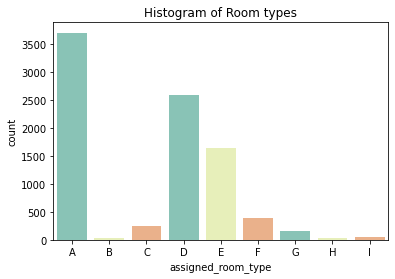

In [35]:
# univariate analysis: room type variable bar graph
import seaborn as sns
sns.countplot(x = df_clean['assigned_room_type'],palette= ["#7fcdbb","#edf8b1","#FAAE7B"]);
plt.title('Histogram of Room types') 
plt.show()

**observation**: most of the clients went for romm type A

## Observations from Univariate Analysis
1. Guests preferred the city hotels to the resort hotels
2. Most guests went for the Bed and Break fast option while the Full board option had the least customers
3.Most of the hotel guests came from Portugal and Great Britain while very few came from Germany
4.The most frequent type of guest was the transient type who came for a short term visit while the group type of guests were the least
5.The most popular months of travel were between May and August with the peak being recorded at July mainly because it is summer in Europe during these months
6.Most popular arrival dates for customers is during end month mostly because that's when people get their salaries 
7.The most popular room type both for bookings and reservations is Type A while the least popular L

# Bivariate Analysis 

### Bar Charts to show the relationship between booking cancellation status and other variables

In [36]:
df_clean['is_canceled'].value_counts()

# 0 = not canceled
# 1 = canceled

1.0    4752
0.0    4122
Name: is_canceled, dtype: int64

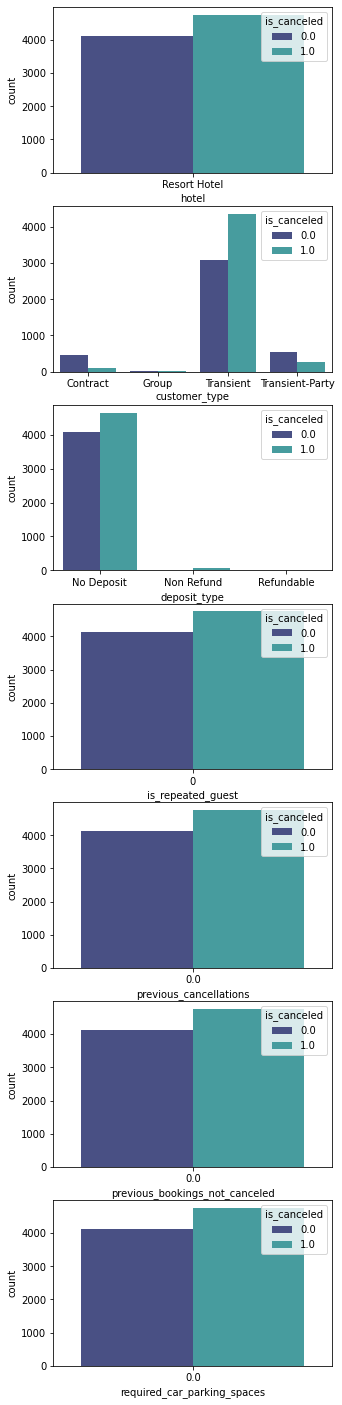

In [37]:
#plotting the target variable against other features.
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

f, axes = plt.subplots(7, 1, figsize=[5, 25])

sns.countplot('hotel', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[0])
sns.countplot('customer_type', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[1])
sns.countplot('deposit_type', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[2])
sns.countplot('is_repeated_guest', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[3])
sns.countplot('previous_cancellations', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[4])
sns.countplot('previous_bookings_not_canceled', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[5])
sns.countplot('required_car_parking_spaces', hue= 'is_canceled', data=df_clean, palette='mako', ax=axes[6])

In [38]:
df_clean.columns

Index(['hotel', 'is_canceled', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

Text(0.5, 1.0, 'Total special requests based on  deposit types')

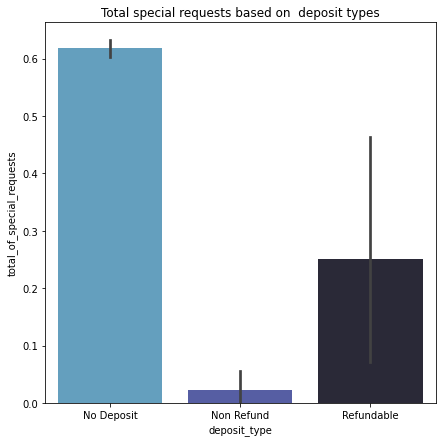

In [39]:
#Distribution of total_of_special_requests and Deposit Type¶

plt.figure(figsize=(7,7))
sns.barplot(x=df_clean['deposit_type'], y=df_clean['total_of_special_requests'], palette=sns.color_palette("icefire"))
plt.title('Total special requests based on  deposit types')


Text(0.5, 1.0, 'Total special requests based on   cancellation')

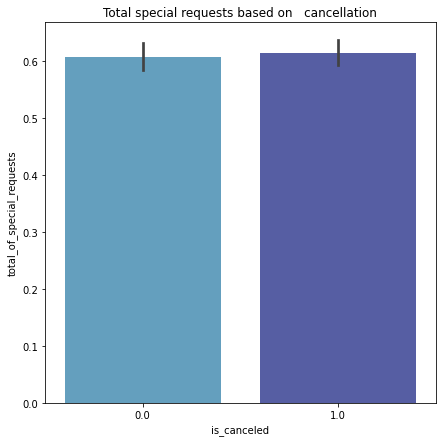

In [40]:
#Distribution of total_of_special_requests and  cancellation

plt.figure(figsize=(7,7))
sns.barplot(x=df_clean['is_canceled'], y=df_clean['total_of_special_requests'], palette=sns.color_palette("icefire"))
plt.title('Total special requests based on   cancellation')




[Text(0, 0.5, ''),
 Text(0.5, 0, 'Reservation_status'),
 Text(0.5, 1.0, 'Guest without special requests')]

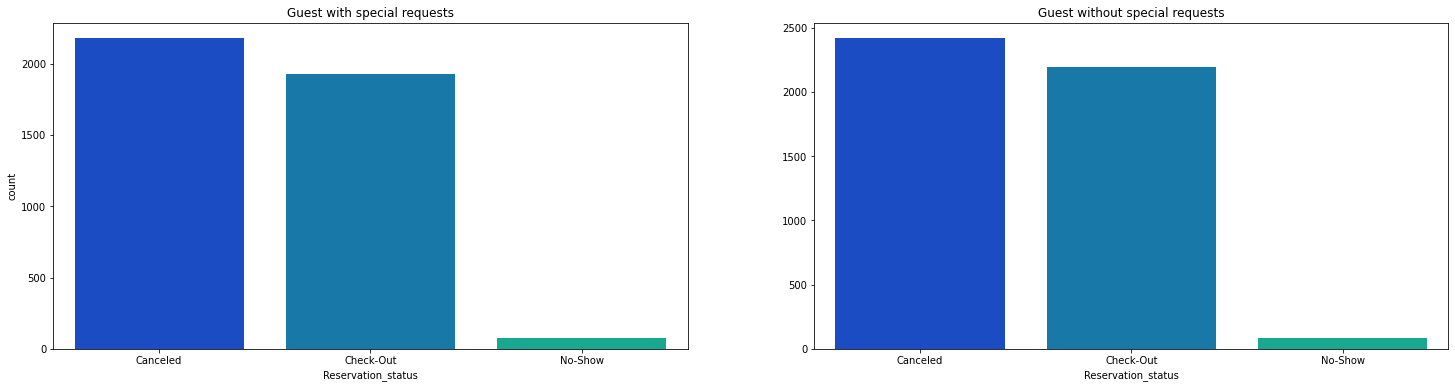

In [41]:
# Special and non Special Request of the guest
fig, ax = plt.subplots(1, 2, figsize=[25, 6])

special = df_clean[df_clean.total_of_special_requests != 0]
non_special = df_clean[df_clean.total_of_special_requests == 0]
special

# Plots
spec = sns.countplot(special.reservation_status, ax = ax[0], palette = 'winter')
spec.set(title = 'Guest with special requests', xlabel = 'Reservation_status')

n_spec = sns.countplot(non_special.reservation_status, ax = ax[1], palette = 'winter')
n_spec.set(title = 'Guest without special requests', ylabel = "", xlabel = 'Reservation_status')

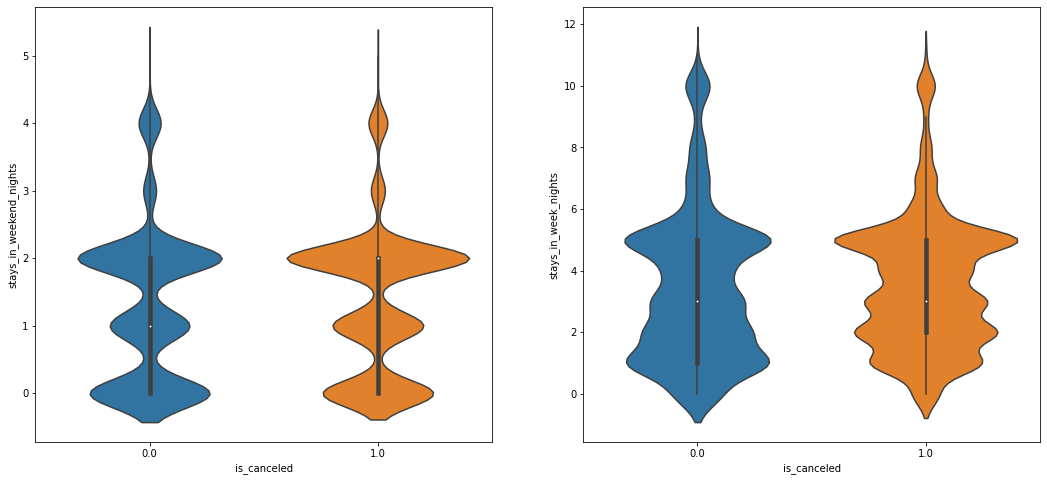

In [42]:
#Stays in weekend Nights and Week Nights for Cancelled and non cancelled bookings

fig, ax = plt.subplots(1, 2, figsize=[18, 8])

sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_weekend_nights"], ax = ax[0] )
sns.violinplot( x=df_clean["is_canceled"], y=df_clean["stays_in_week_nights"], ax = ax[1] )

In [43]:
#sns.pairplot(df_clean,kind="scatter", diag_kind="kde", hue="is_canceled")

## Observations from the Bivariate Analysis
1. We see that it is more likely for customers from the city hotel to cancel their booking than the ones from the resort hotel

2. For customer type, the transient customers were most likely to cancel while groups cancelled least

3. We also saw that the guests who put no deposit were very likely to cancel because they had nothing to lose while the ones who put a refundable deposit didn't cancel at all 

4. The bivariate analysis also shows that it was by far less likely for repeated guests to cancel compared to their new counterparts


In [44]:
df_clean2=df_clean.copy()


In [45]:
# Label encoding to change our categorical variables to numerical to be able to create our correlation matrix

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df_clean['hotel'] = en.fit_transform(df_clean['hotel'])
df_clean['arrival_date_month'] = en.fit_transform(df_clean['arrival_date_month'])
df_clean['country'] = en.fit_transform(df_clean['country'])
df_clean['meal'] = en.fit_transform(df_clean['meal'])
df_clean['reserved_room_type'] = en.fit_transform(df_clean['reserved_room_type'])
df_clean['assigned_room_type'] = en.fit_transform(df_clean['assigned_room_type'])
df_clean['deposit_type'] = en.fit_transform(df_clean['deposit_type'])
df_clean['customer_type'] = en.fit_transform(df_clean['customer_type'])
df_clean['reservation_status'] = en.fit_transform(df_clean['reservation_status'])
df_clean

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,0.0,5,1.0,0.0,0,2.0,0,0,0,70,0,0.0,0.0,2,2,0,2,0.0,0.0,1
4,0,0.0,5,1.0,0.0,2,2.0,0,0,0,34,0,0.0,0.0,0,0,0,2,0.0,1.0,1
6,0,0.0,5,1.0,0.0,2,2.0,0,0,0,70,0,0.0,0.0,2,2,0,2,0.0,0.0,1
7,0,0.0,5,1.0,0.0,2,2.0,0,0,1,70,0,0.0,0.0,2,2,0,2,0.0,1.0,1
8,0,1.0,5,1.0,0.0,3,2.0,0,0,0,70,0,0.0,0.0,0,0,0,2,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21937,0,0.0,7,12.0,0.0,1,2.0,0,0,0,70,0,0.0,0.0,0,3,0,3,0.0,0.0,1
21939,0,0.0,7,11.0,0.0,2,2.0,0,0,0,70,0,0.0,0.0,0,3,0,3,0.0,1.0,1
21940,0,0.0,7,12.0,0.0,1,2.0,0,0,1,30,0,0.0,0.0,3,3,0,2,0.0,0.0,1
21941,0,0.0,7,12.0,0.0,1,2.0,0,0,0,70,0,0.0,0.0,0,0,0,2,0.0,1.0,1


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Splitting data into Input and Target Variable

y = df_clean[['is_canceled']]  # target variable 
X = df_clean.drop(['is_canceled'], axis=1)  # input variables

In [48]:
# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [49]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
#creating model. creat regressor object and train it using train data
#
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state = 1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

In [51]:
# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)#

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred)

print("Baseline Model Accuracy:", ac)
print("Baseline Model F1 Score:", f_score)

Baseline Model Accuracy: 0.9808450704225352
Baseline Model F1 Score: 0.9819341126461212


In [52]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

#Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False  True False  True  True False False False  True  True False False
 False  True  True  True  True False False  True]
Feature Ranking: [11  1  2  1  1  9  7  6  1  1 10  8  5  1  1  1  1  4  3  1]


In [53]:
X.info()#0,1,4,8,9,13,14,15,18,19

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8874 entries, 0 to 21943
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           8874 non-null   int64  
 1   arrival_date_month              8874 non-null   int64  
 2   arrival_date_day_of_month       8874 non-null   float64
 3   stays_in_weekend_nights         8874 non-null   float64
 4   stays_in_week_nights            8874 non-null   int64  
 5   adults                          8874 non-null   float64
 6   children                        8874 non-null   int64  
 7   babies                          8874 non-null   int64  
 8   meal                            8874 non-null   int64  
 9   country                         8874 non-null   int64  
 10  is_repeated_guest               8874 non-null   int64  
 11  previous_cancellations          8874 non-null   float64
 12  previous_bookings_not_canceled  8

In [54]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.iloc[:, 0:]),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


,Feature,Ranking
9,country,1
16,customer_type,1
15,deposit_type,1
14,assigned_room_type,1
13,reserved_room_type,1
8,meal,1
19,reservation_status,1
4,stays_in_week_nights,1
3,stays_in_weekend_nights,1
1,arrival_date_month,1


In [55]:
df2 = df_clean[['hotel', 'deposit_type','assigned_room_type','reserved_room_type','total_of_special_requests','meal','country','stays_in_week_nights','arrival_date_month','reservation_status']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8874 entries, 0 to 21943
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      8874 non-null   int64  
 1   deposit_type               8874 non-null   int64  
 2   assigned_room_type         8874 non-null   int64  
 3   reserved_room_type         8874 non-null   int64  
 4   total_of_special_requests  8874 non-null   float64
 5   meal                       8874 non-null   int64  
 6   country                    8874 non-null   int64  
 7   stays_in_week_nights       8874 non-null   int64  
 8   arrival_date_month         8874 non-null   int64  
 9   reservation_status         8874 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 1.1 MB


In [56]:
df2.columns

Index(['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status'],
      dtype='object')

In [57]:
df_clean2=df_clean2[['hotel', 'deposit_type', 'assigned_room_type', 'reserved_room_type',
       'total_of_special_requests', 'meal', 'country', 'stays_in_week_nights',
       'arrival_date_month', 'reservation_status']]
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8874 entries, 0 to 21943
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      8874 non-null   category
 1   deposit_type               8874 non-null   category
 2   assigned_room_type         8874 non-null   category
 3   reserved_room_type         8874 non-null   category
 4   total_of_special_requests  8874 non-null   float64 
 5   meal                       8874 non-null   category
 6   country                    8874 non-null   category
 7   stays_in_week_nights       8874 non-null   int64   
 8   arrival_date_month         8874 non-null   category
 9   reservation_status         8874 non-null   category
dtypes: category(8), float64(1), int64(1)
memory usage: 602.1 KB


In [58]:
df_clean2_copy = df_clean2.copy()

so we are going the following algorithms:


1. Logistic Reg
2. Random Forest
2. Gradient Boosted Trees
4. Naive Bayes Classifier
5. Neural Networks
6. k-NN classifier
7. SVM




Logistic Regression


1.   Base Model



In [59]:
# Splitting data into features and Target 
X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#training basic model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

#Making predictions
y_pred = LogReg.predict(X_test)

#Assessing the model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9816414686825055

Trying out logistic Regression using cross validated train and test *sets*

In [60]:
# Splitting data into features and Target 
from sklearn.model_selection import KFold #for cross validation
X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 

folds = KFold(n_splits=5)

rmses = []
count = 1
for train, test in folds.split(X):
    
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y[test]

#training basic model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
  
#Assessing the model
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6663833805476864

The basic model gives an accuracy of98% using AUC-ROC we'll parameter tune to see if performance increases.

Tuning the Logistic Model

In [61]:
# Splitting data into features and Target 
X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#training basic model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
from sklearn.model_selection import GridSearchCV
#getting to choose parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,150,300))}
clf = GridSearchCV(LogReg, param_grid=param_grid, verbose = 3, cv=5)
clf.fit(X_train , y_train)
clf.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.001, max_iter=100, penalty=l1 ...............................
[CV] ..... C=0.001, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1 ...............................
[CV] ..... C=0.001, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1 ...............................
[CV] ..... C=0.001, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1 ...............................
[CV] ..... C=0.001, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l1 ...............................
[CV] ..... C=0.001, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, max_iter=100, penalty=l2 ...............................
[CV] ... C=0.001, max_iter=100, penalty=l2, score=0.863, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=0.001, max_iter=100, penalty=l2, score=0.882, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2 ...............................
[CV] ... C=0.001, max_iter=100, penalty=l2, score=0.844, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2 ...............................
[CV] ... C=0.001, max_iter=100, penalty=l2, score=0.848, total=   0.1s
[CV] C=0.001, max_iter=100, penalty=l2 ...............................
[CV] ... C=0.001, max_iter=100, penalty=l2, score=0.865, total=   0.1s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] ...... C=0.01, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, max_iter=100, penalty=l1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    4.1s finished


{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

The best parameters that were selected were c=0.1, max_iter=100, penalty=l2, score=0.987

c specify stronger regularization
l2 regularization - ridge 

In [65]:
#making prediction
y_pred = clf.predict(X_test)

#Comparing Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1770,0.0,0.0
1771,1.0,1.0
1772,1.0,1.0
1773,1.0,1.0


In [66]:
#accuracy check using AUC-ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score
from sklearn import metrics

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9816414686825055

Random Forest

1. Base model

In [67]:
# Splitting data into features and Target 
X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Training  decision tree model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

#making prediction
y_pred = forest.predict(X_test)

#Comparing Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1770,0.0,0.0
1771,1.0,1.0
1772,1.0,1.0
1773,1.0,1.0


In [68]:
#accuracy check using AUC-ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score
from sklearn import metrics

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9919006479481641

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Visualization of the basic model.

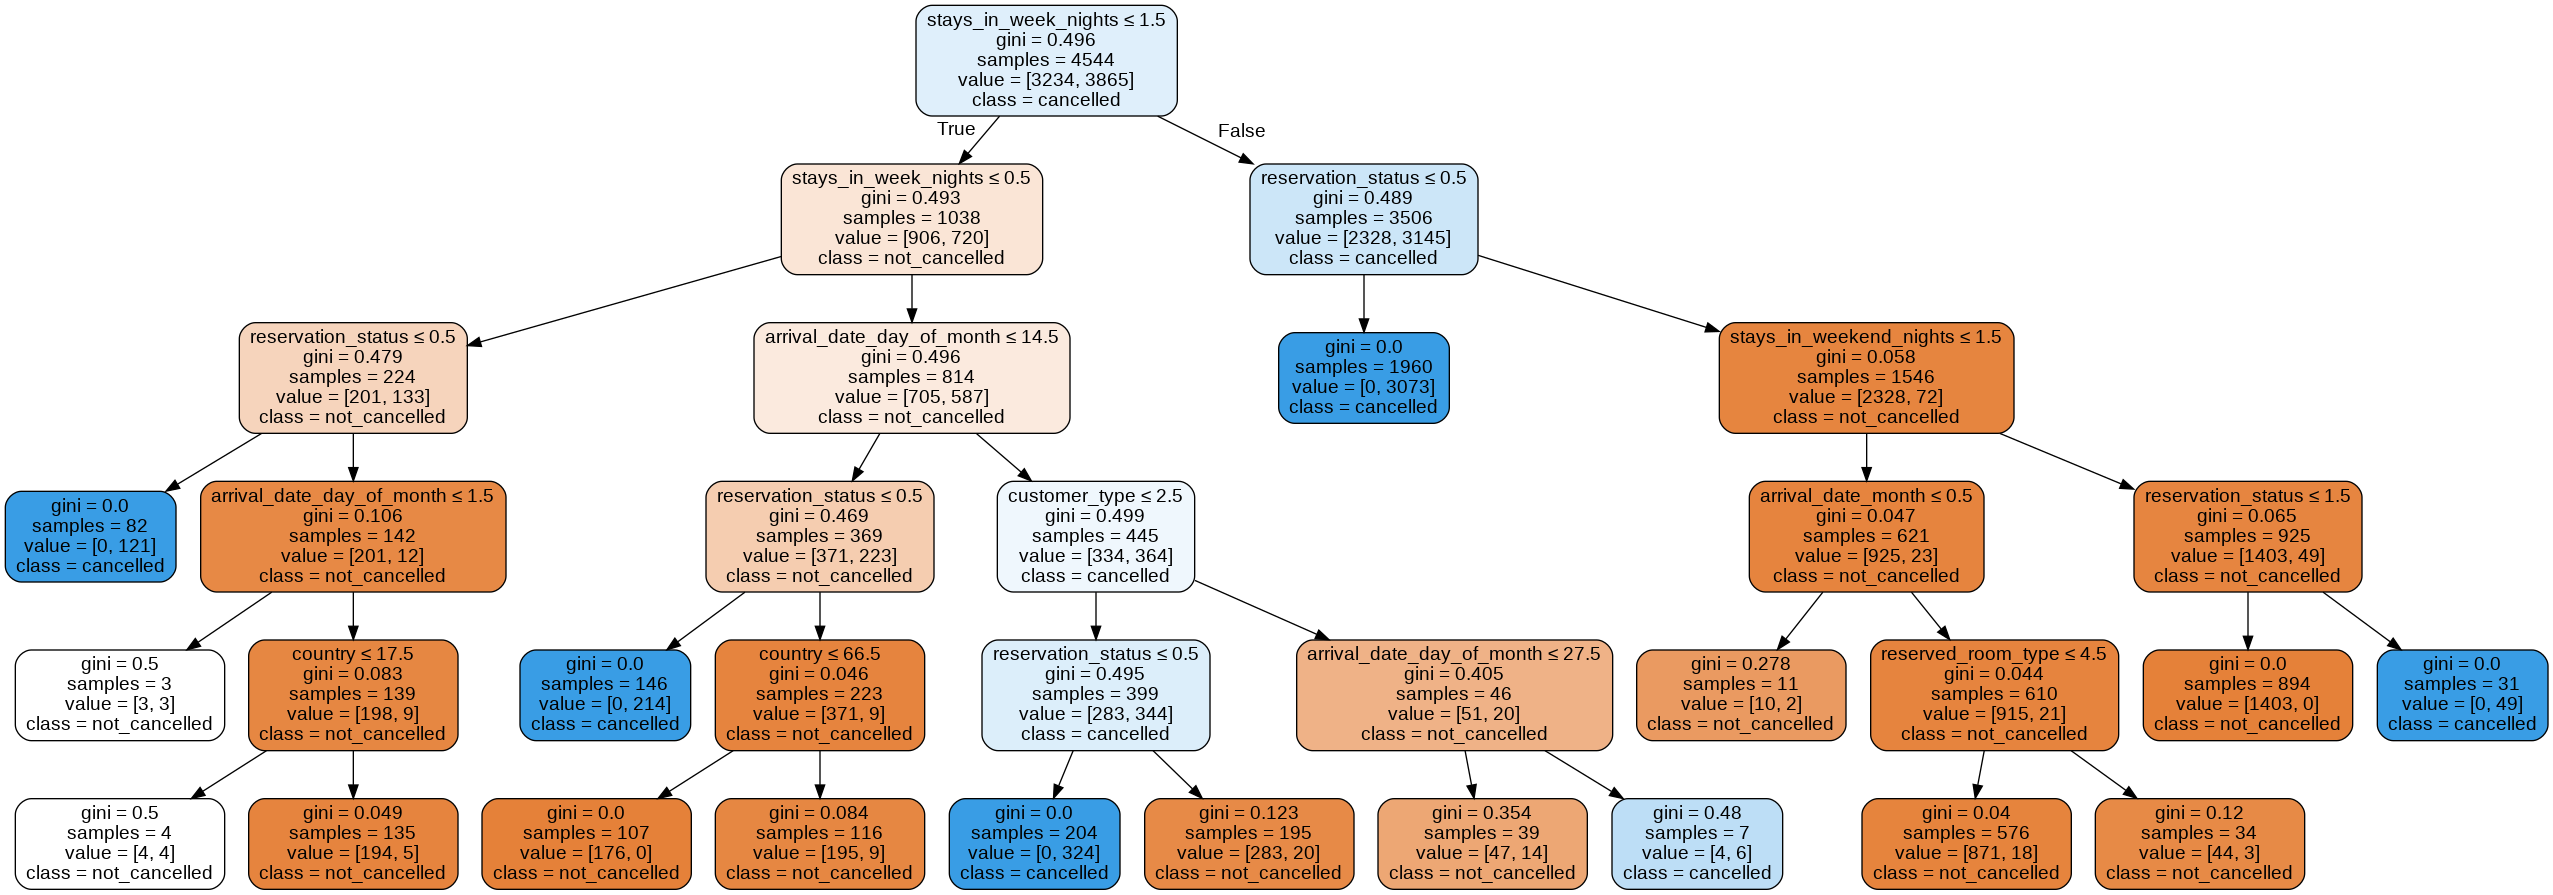

In [69]:
test_features = df_clean.columns.to_list()
test_features.remove('is_canceled')

#Visualizing the Random forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['not_cancelled', 'cancelled'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hotel_forest.png')
Image(graph.create_png())


The selected decision tree is based on customer type, it splits the dataset on values 2.5 and is split to [24292, 10877]. This means that on our current training data 24,292 reservations were not cancelled while 10,877 were cancelled.Hence the root node has a class of not cancelled.
The left children of the root node, the node has a class of not cancelled that indicates that the left side of our random forest has a bias towards reservations that were not cancelled.


Feature Importance

In [70]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
print(feature_importances) 

#sort the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('hotel', 0.0), ('arrival_date_month', 0.0), ('arrival_date_day_of_month', 0.01), ('stays_in_weekend_nights', 0.0), ('stays_in_week_nights', 0.01), ('adults', 0.0), ('children', 0.0), ('babies', 0.0), ('meal', 0.0), ('country', 0.0), ('is_repeated_guest', 0.0), ('previous_cancellations', 0.0), ('previous_bookings_not_canceled', 0.0), ('reserved_room_type', 0.0), ('assigned_room_type', 0.0), ('deposit_type', 0.0), ('customer_type', 0.0), ('required_car_parking_spaces', 0.0), ('total_of_special_requests', 0.0), ('reservation_status', 0.98)]
Variable: reservation_status   Importance: 0.98
Variable: arrival_date_day_of_month Importance: 0.01
Variable: stays_in_week_nights Importance: 0.01
Variable: hotel                Importance: 0.0
Variable: arrival_date_month   Importance: 0.0
Variable: stays_in_weekend_nights Importance: 0.0
Variable: adults               Importance: 0.0
Variable: children             Importance: 0.0
Variable: babies               Importance: 0.0
Variable: meal      

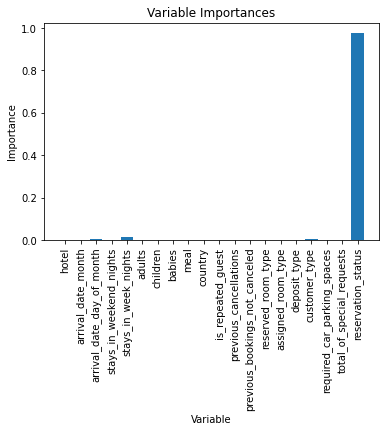

In [71]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Tuning the random forest

In [72]:
# Splitting data into features and Target 
X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 

#Test size of 20%  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [73]:
#Training  decision tree model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()
parameters = {
    'n_estimators': [80, 90, 100, 300, 500],
    'max_depth': [5,15,4,10],
    #'min_samples_split': [8, 10, 12]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = forest, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print('The best parameters ',grid_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.7s finished


The best parameters  {'max_depth': 15, 'n_estimators': 300}


In [74]:
grid_search.best_score_

0.9997182900078484

In [75]:
print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [76]:
#Trying with the best parameters set manually
rforest = RandomForestClassifier(n_estimators=100, max_depth=15, criterion='gini')
rforest = rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)


Accuracy  0.9994366197183099
Mean Absolute Error: 0.0005633802816901409
Mean Squared Error: 0.0005633802816901409
Root Mean Squared Error: 0.023735633163877067


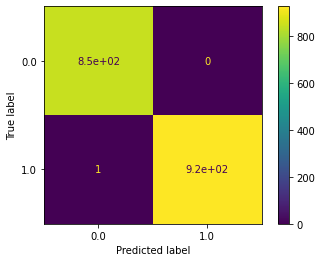

In [77]:
#Accuracy Score
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

#assessing prediction errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rforest,X_test,y_test)

In [78]:
#checking accuracy using AUC
roc_auc_score(y_test, y_pred)

0.9994600431965444

In [79]:
test_features = df_clean.columns.to_list()
test_features.remove('is_canceled')

In [80]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]
print(feature_importances) 

#sort the values in descending order.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('hotel', 0.0), ('arrival_date_month', 0.0), ('arrival_date_day_of_month', 0.01), ('stays_in_weekend_nights', 0.0), ('stays_in_week_nights', 0.01), ('adults', 0.0), ('children', 0.0), ('babies', 0.0), ('meal', 0.0), ('country', 0.0), ('is_repeated_guest', 0.0), ('previous_cancellations', 0.0), ('previous_bookings_not_canceled', 0.0), ('reserved_room_type', 0.0), ('assigned_room_type', 0.0), ('deposit_type', 0.0), ('customer_type', 0.0), ('required_car_parking_spaces', 0.0), ('total_of_special_requests', 0.0), ('reservation_status', 0.98)]
Variable: reservation_status   Importance: 0.98
Variable: arrival_date_day_of_month Importance: 0.01
Variable: stays_in_week_nights Importance: 0.01
Variable: hotel                Importance: 0.0
Variable: arrival_date_month   Importance: 0.0
Variable: stays_in_weekend_nights Importance: 0.0
Variable: adults               Importance: 0.0
Variable: children             Importance: 0.0
Variable: babies               Importance: 0.0
Variable: meal      

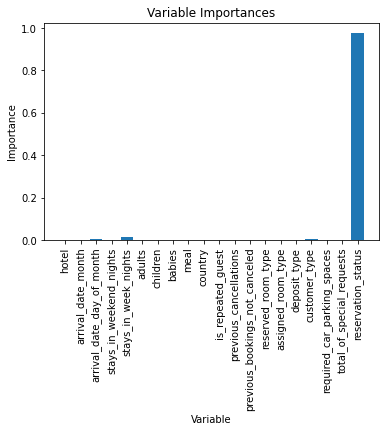

In [81]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, test_features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Gradient Boosting 
-Light GBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following :

Faster training speed and higher efficiency.

Lower memory usage.

Better accuracy.

Support of parallel and GPU learning.

Capable of handling large-scale data.

In [86]:
#Libraries necessary for GBM classifier
import lightgbm as lgb 
from lightgbm import LGBMClassifier 
from sklearn.metrics import classification_report

X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 

#Test size of 20%  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Creating an object for model and fitting it on training data set  
model = LGBMClassifier() 
model.fit(X_train, y_train)

# Predicting the Target variable 
pred = model.predict(X_test) 
print(pred) 

accuracy = model.score(X_test, y_test) 
print(accuracy)

cm = confusion_matrix(y_test, pred)
print(cm)

print(classification_report(y_test,pred))

[0. 1. 1. ... 0. 0. 1.]
1.0
[[1677    0]
 [   0 1873]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1677
         1.0       1.00      1.00      1.00      1873

    accuracy                           1.00      3550
   macro avg       1.00      1.00      1.00      3550
weighted avg       1.00      1.00      1.00      3550



The accuracy being at 100% is wanting since it resultsin an overfitted model.
Parameter tuning is needed to see if accuracy changes.

Tuned LGBM

In [87]:
#Tuning GBM model
from sklearn.model_selection import GridSearchCV

lgbm = lgb.LGBMClassifier()
params = {'max_depth':[25, 50, 75],
          'learning_rate':[0.01, 0.05, 0.1],
          'num_leaves': [300, 900, 1200],
          'n_estimators': [ 200]
          }
#create an object of grid search
grid_search_lgbm = GridSearchCV(lgbm, n_jobs=-1, param_grid=params, cv=3, verbose =5)

#fit lgbm
grid_search_lgbm = grid_search_lgbm.fit(X_train, y_train)
grid_search_lgbm.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    6.9s finished


{'learning_rate': 0.01,
 'max_depth': 25,
 'n_estimators': 200,
 'num_leaves': 300}

In [88]:
#best params
grid_search_lgbm.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=25,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [89]:
#predicting and accuracy check
y_pred = grid_search_lgbm.predict(X_test)

#Comparing Actual with predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

,Actual,Predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
3545,0.0,0.0
3546,1.0,1.0
3547,0.0,0.0
3548,0.0,0.0


Accuracy  1.0


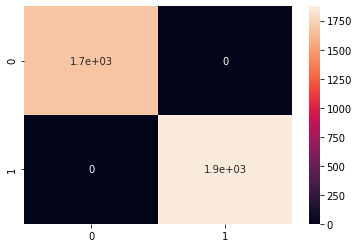

In [90]:
#Accuracy Score
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

#Checking the confusion matrix
confused=confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)

In [91]:
#checking accuracy using AUC
roc_auc_score(y_test, y_pred)

1.0

XGBoost

In [92]:
import xgboost as xgb

X = df_clean.drop(['is_canceled'], axis=1).values
y = df_clean['is_canceled'] .values 

#Test size of 20%  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating an object for model and fitting it on training data 
model = xgb.XGBClassifier()
param_dist = {'max_depth': [10, 30, 50],
              'min_child_weight' : [1,3,6],
               'n_estimators': [100, 150, 200],
               'learning_rate': [0.05, 0.1, 0.16] }

grid_search = GridSearchCV(model, param_grid=param_dist, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [93]:
#training a tuned model
model = xgb.XGBClassifier(max_depth=10 , min_child_weight=1, n_estimators=100 ,n_jobs=1 , verbose=1, learning_rate=0.05)
model.fit(X_train, y_train)

#predicting and accuracy check
y_pred = model.predict(X_test)

#Comparing Actual with predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame)

#predicting probabilities of the test data
from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
#Keep the probabilities of the positive class
probs = probs[:, 1]

#AUC Score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)


      Actual  Predicted
0        0.0        0.0
1        1.0        1.0
2        1.0        1.0
3        1.0        1.0
4        0.0        0.0
...      ...        ...
1770     0.0        0.0
1771     1.0        1.0
1772     1.0        1.0
1773     1.0        1.0
1774     0.0        0.0

[1775 rows x 2 columns]
AUC: 1.00


Accuracy  1.0


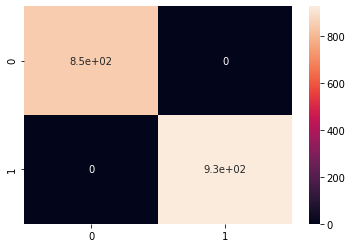

In [94]:
#Accuracy Score
print("Accuracy ",metrics.accuracy_score(y_test, y_pred))

#Checking the confusion matrix
confused=confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)

In [95]:
#checking accuracy using AUC
roc_auc_score(y_test, y_pred)

1.0